In [45]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import quad    
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
#Parameters Setting Panel
budget=100000
daily_active_users=250
daily_limit=365
organic_traffic=0.2
cpi=5
r1,r2,r3,r4,r5,r6,r7,r8,r9,r10=0.4,0.2,0.12,0.08,0.05,0.04,0.03,0.02,0.01,0.005
conversion=0.05
num_of_tracs=3
avg_tracs=10

In [47]:
user_to_money_factor=conversion*num_of_tracs*avg_tracs

In [73]:
bud_or_user=input('Budget (b) or Users (u) Simulation?:')

Budget (b) or Users (u) Simulation?:b


In [74]:
if bud_or_user=='b':
    daily_active_users=budget/cpi*(1+organic_traffic)/daily_limit
else:
    pass

In [75]:
retention=[[1,r1],
           [7,r2],
           [14,r3],
           [30,r4],
           [45,r5],
           [60,r6],
           [90,r7],
           [180,r8],
           [270,r9],
           [365,r10]]

In [76]:
df_r=pd.DataFrame(retention)
df_r.columns=['t','retention']

In [77]:
x = df_r['t'].to_numpy()
y= df_r['retention'].to_numpy()

In [78]:
def fit_func(x, a, b):
    return np.exp(-b*(x-a))

popt, pcov = curve_fit(fit_func, x, y, p0=[30,r4])

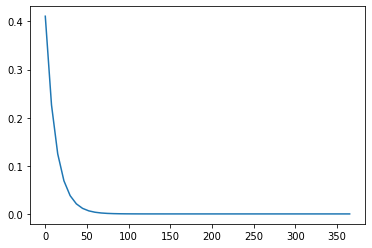

In [79]:
xx = np.linspace(0,daily_limit)
yy = fit_func(xx, *popt)
plt.plot(xx, yy)

In [80]:
def int_func(xx): 
    return daily_active_users*fit_func(xx, *popt)

#res, err = quad(int_func,xmin, xmax) 
#print ('norm: ', res)

In [90]:
user_simulation=[]
for t in range(daily_limit):
    yt,err=quad(int_func,0, t) 
    user_simulation.append([t,yt+daily_active_users])

In [91]:
df_user_simulation=pd.DataFrame(user_simulation)
df_user_simulation.columns=['t','DAU']

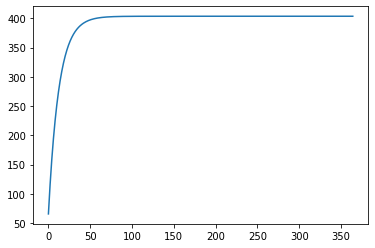

In [92]:
df_user_simulation['DAU'].plot()

In [93]:
total_users=daily_active_users*daily_limit
total_revenue=total_users*user_to_money_factor
total_revenue_per_period=total_revenue/daily_limit

In [94]:
df_user_simulation['ARPDAU']=total_revenue_per_period/df_user_simulation['DAU']

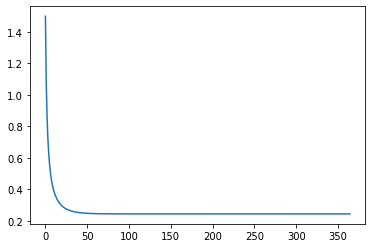

In [95]:
df_user_simulation['ARPDAU'].plot()

In [96]:
print('in Steady state the DAU is:',round(df_user_simulation['DAU'].max(),2),'and ARPDAU is:',round(df_user_simulation['ARPDAU'].min(),2))

in Steady state the DAU is: 403.57 and ARPDAU is: 0.24


In [97]:
df_user_simulation

,t,DAU,ARPDAU
0,0,65.753425,1.500000
1,1,91.712454,1.075428
2,2,115.676714,0.852636
3,3,137.799491,0.715751
4,4,158.222289,0.623364
...,...,...,...
360,360,403.572742,0.244392
361,361,403.572742,0.244392
362,362,403.572742,0.244392
363,363,403.572742,0.244392
